"""

This notebook intends to illustrate how matrix profile is used to detect anomaly time series sequence.
It does not output any data and no output is used in the final prediction.

"""

In [3]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matrixprofile as mp

### Define Path and Load data

In [4]:
path = '../data-sets/KDD-Cup/data/'
period_path = '../data-sets/KDD-Cup/period/period.csv'
files_name = [i for i in os.listdir(path) if 'Anomaly' in i] #remove irrelevant files
files_name.sort(key = lambda x : x.split('_')[0]) #sort by id

In [5]:
period = pd.read_csv(period_path) #load period file calculated by fourier transform
period.head()

,File_name,Period
0,001_UCR_Anomaly_35000.txt,210
1,002_UCR_Anomaly_35000.txt,208
2,003_UCR_Anomaly_35000.txt,209
3,004_UCR_Anomaly_2500.txt,80
4,005_UCR_Anomaly_4000.txt,24


### Load Data

In [40]:
name = files_name[100]
print("The example data used is :",name)
split_index  = int(name.split('.')[0].split('_')[3]) #get split index
data = pd.read_csv(path+name,header=None)
train= data[0:split_index]

The example data used is : 101_UCR_Anomaly_6000.txt


### Normalize whole data using mean & std of train

In [41]:
training_mean = train.mean()  #record mean
training_std = train.std() #record std
normalized_data = (data - training_mean) / training_std

### Compute Matrix profile using window size = period

In [42]:
window_size = int(period[period['File_name'] == name]['Period'])

profile = mp.compute(normalized_data[0].values, window_size)

### Plot Matrix Profiles

Text(0.5, 0, 'Index')

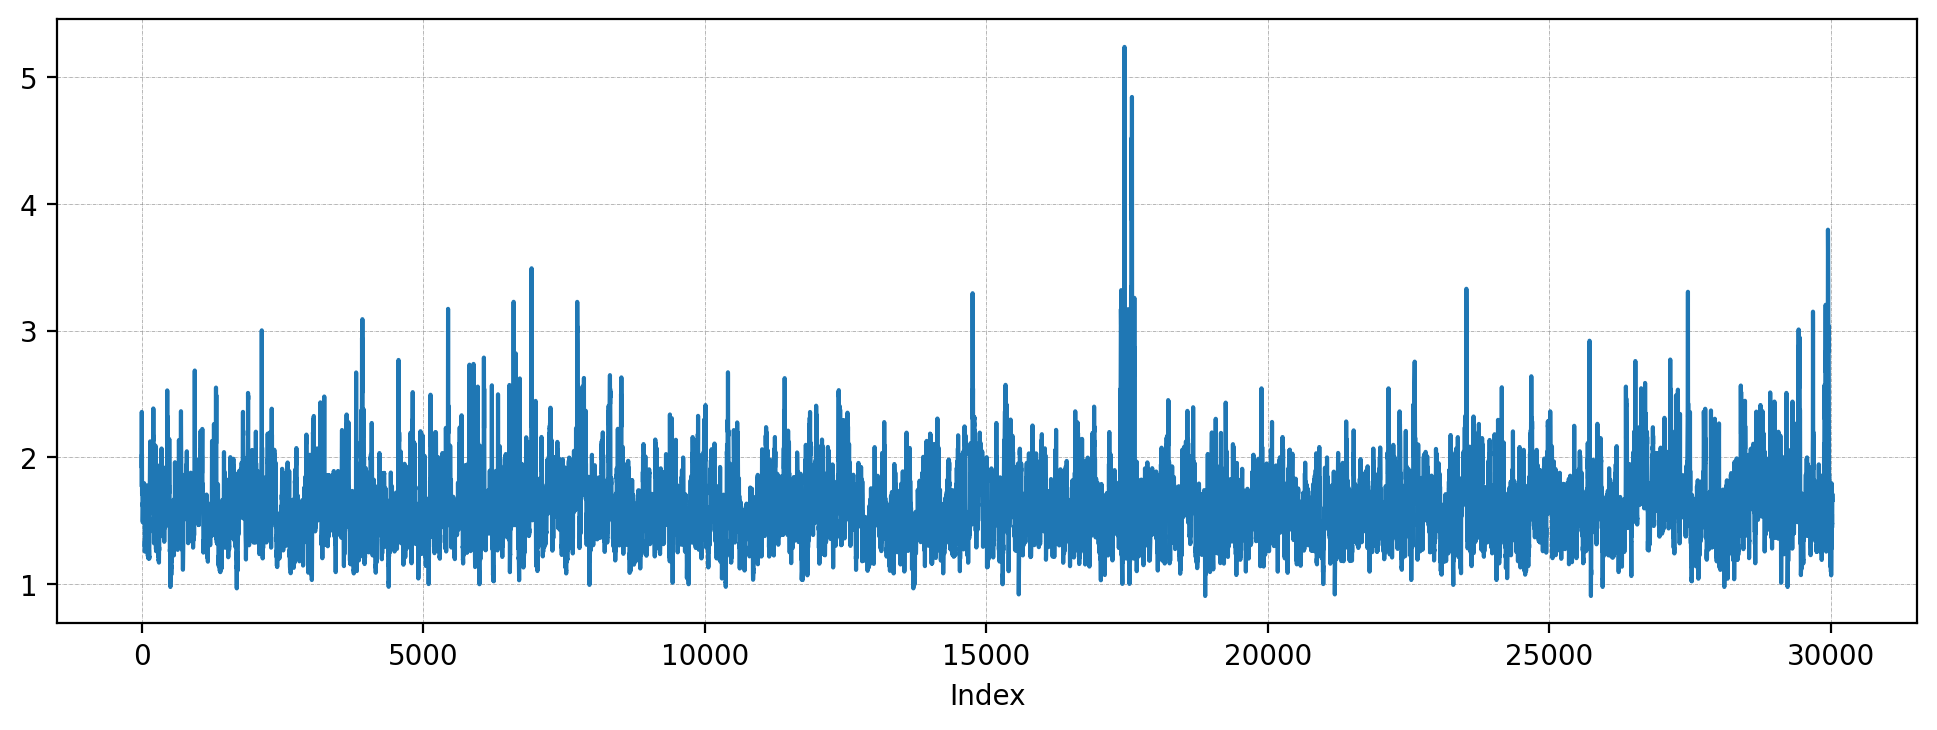

In [44]:
fig = plt.figure(figsize=[12,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

plt.plot(profile['mp'])
plt.xlabel('Index')

### Find Discords

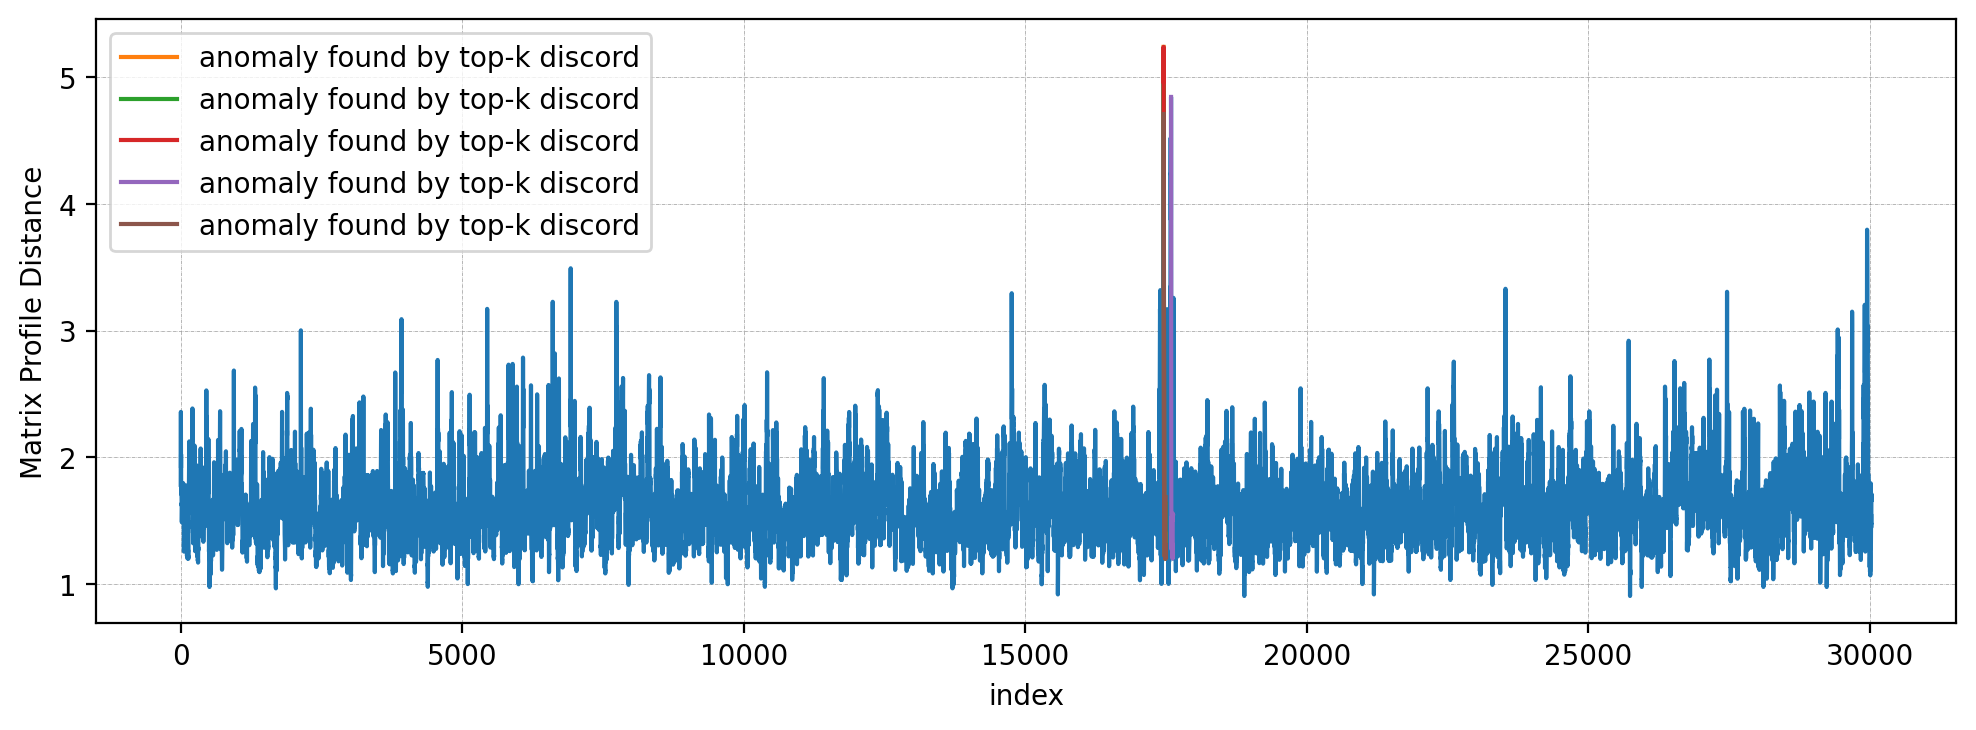

In [74]:
profile_with_discords = mp.discover.discords(profile, k=5)
mp_adjusted = np.append(profile_with_discords['mp'], np.zeros(window_size - 1) + np.nan)

fig = plt.figure(figsize=[12,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

ax = plt.plot(normalized_data.index, mp_adjusted)

for start_index in profile_with_discords['discords']:
    x = normalized_data.index.values[start_index:start_index+window_size]
    y = mp_adjusted[start_index:start_index+window_size]
    plt.plot(x, y,label='anomaly found by top-k discord')

plt.xlabel('index')
plt.ylabel('Matrix Profile Distance')
plt.legend()